<h1>Classifying the Iris dataset using **support vector machines** (SVMs)</h1>

In this tutorial we are going to explore the Iris dataset and analyse the results of classification using SVMs. In this tutorial i will be using Support vector machines with dimentianility reduction techniques like PCA and Scallers to classify the dataset efficiently.

<h2>Data exploration</h2>
Data exploration is very important befoe trying to classify or fit the data as it will help you choose the best algorithm to use. Data exploration will also till you about the initial connfiguration of some hyper parameters like the degree of polynomial or the type of the kernel.
Now let's import the libraries we are going to use in this stage and then load the data from the dataset. The X represents the **features matrix** and the y represents the **target vector**

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :]
y = iris.target
print ("Number of data points ::", X.shape[0])
print("Number of features ::", X.shape[1])

Number of data points :: 150
Number of features :: 4


Many machine learning algorithms require the data to be in normal distribution that is the Mean equals 0 and with unit vairance. This will help the features to represent the data better since a feature with high variance will not dominate the others, to know more about that refere to the Sklearn doumentation [here](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) .
Here we will use the **Standard Scaler** to transform the data.

In [0]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

<h2>Dimentionality Reduction</h2>
Dimentionality reduction is a really important concept in Machine Learning since it reduces the number of features in a dataset and hence reduces the computations needed to fit the model. PCA is one of the well known efficient dimentaniolaty reduction techniques. in this tutorial we will use  **PCA** which compreses the data by projecting it to a new subspace that can help in reducing the effect of the **curse of dimentionality**.
Our dataset consists of 4 dimentions(4 features) so we will project it to a 3 dimentions space and Plot in in a 3d graph.

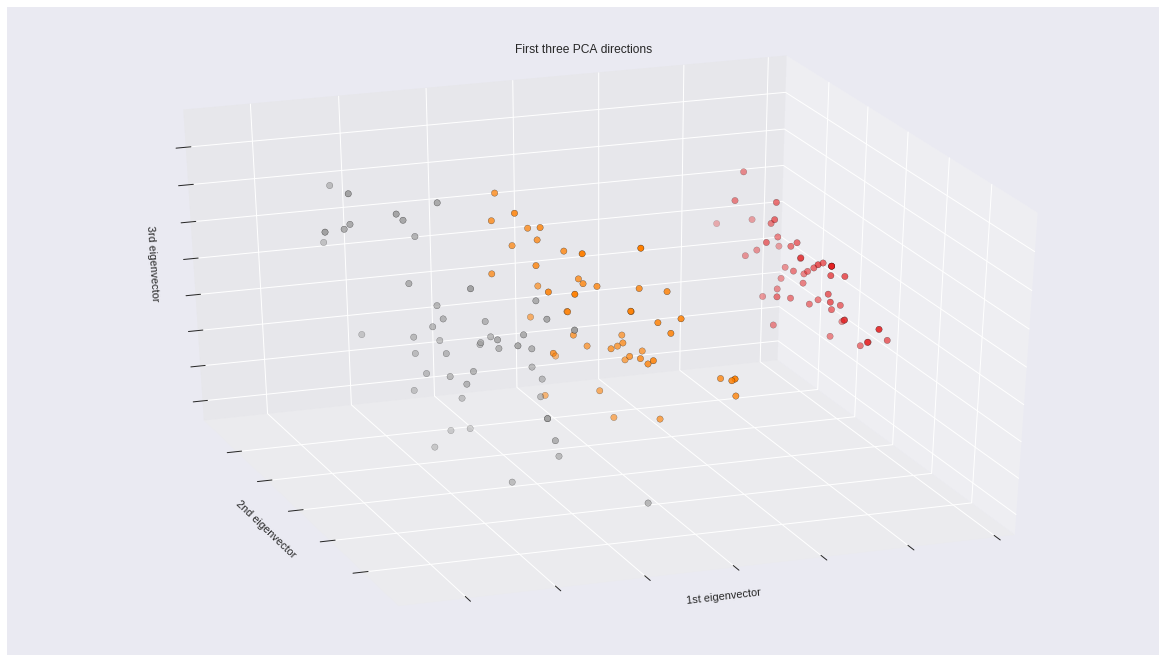

The number of features in the new subspace is  3


In [4]:
fig = plt.figure(1, figsize=(16, 9))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(X_scaled)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()
print("The number of features in the new subspace is " ,X_reduced.shape[1])

<h2>Training the Support Vector Machine Algorithm  </h2>
Now les't perform the train test split on the transformed data. We will use the convention that splits the data in 80% training/validation and 20% test set. We set the random state to a constant value in order to get consistent results when we rerun the code.

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
                        X_reduced, y, test_size=0.2, random_state=42)

Let's now try fitting a Linear SVM that is imported from sklearn.

In [9]:
from sklearn.svm import LinearSVC

clf = LinearSVC(penalty='l2', loss='squared_hinge',
                dual=True, tol=0.0001, C=100, multi_class='ovr',
                fit_intercept=True, intercept_scaling=1, class_weight=None,verbose=0
                , random_state=0, max_iter=1000)
clf.fit(X_train,y_train)

print('Accuracy of linear SVC on training set: {:.2f}'.format(clf.score(X_train, y_train)))

print('Accuracy of linear SVC on test set: {:.2f}'.format(clf.score(X_test, y_test)))

Accuracy of linear SVC on training set: 0.97
Accuracy of linear SVC on test set: 1.00


It's time to tune the C parameter and see if we can reach better results. we will perform the tuning automatically using grid search algorithm that is imported from scikit learn. we will use exponential range for c parameters with base = 1.02.

In [6]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
import numpy as nps
    
c = np.logspace(start = -15, stop = 1000, base = 1.02)
param_grid = {'C': c}


grid = GridSearchCV(clf, param_grid =param_grid, cv=3, n_jobs=-1, scoring='accuracy')
grid.fit(X_train, y_train)
  
print("The best parameters are %s with a score of %0.0f" % (grid.best_params_, grid.best_score_ * 100 ))
print( "Best estimator accuracy on test set {:.2f} ".format(grid.best_estimator_.score(X_test, y_test) * 100 ) )

The best parameters are {'C': 5.777360913698984} with a score of 96
Best estimator accuracy on test set 100.00 


The training results are not improved after tuning the c parameter with grid search and the test score is still 100 which is a good indication that the model is not overfitting nor underfitting. but we can still try improve the training accuracy to ensure that it will catch more test data if new data were intrerduced as the dataset is really small and that may be a bit tricky.

Let's not try non linear SVC and see the results

In [7]:
from sklearn.svm import SVC

clf_SVC = SVC(C=100.0, kernel='rbf', degree=3, gamma='auto', coef0=0.0, shrinking=True, 
          probability=False, tol=0.001, cache_size=200, class_weight=None, 
          verbose=0, max_iter=-1, decision_function_shape="ovr", random_state = 0)
clf_SVC.fit(X_train,y_train)

print('Accuracy of SVC on training set: {:.2f}'.format(clf_SVC.score(X_train, y_train) * 100))

print('Accuracy of SVC on test set: {:.2f}'.format(clf_SVC.score(X_test, y_test) * 100))

Accuracy of SVC on training set: 99.17
Accuracy of SVC on test set: 100.00


It seems the training score is a little higher than linear SVC but let's try to tune the parameters using grid search to optmize more

In [8]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
import numpy as np
    
c_SVC = np.logspace(start = 0, stop = 10, num = 100, base = 2 , dtype = 'float64')
print( 'the generated array of c values')
print ( c_SVC )
param_grid_S = {'C': c_SVC}



print("\n Array of means \n")
clf = GridSearchCV(clf_SVC, param_grid =param_grid_S, cv=20 , scoring='accuracy')
clf.fit(X_train, y_train)

y_true, y_pred = y_test, clf.predict(X_test)
print( '\nClassification report\n' )
print(classification_report(y_true, y_pred))


the generated array of c values
[1.00000000e+00 1.07252413e+00 1.15030800e+00 1.23373308e+00
 1.32320850e+00 1.41917304e+00 1.52209732e+00 1.63248610e+00
 1.75088073e+00 1.87786182e+00 2.01405211e+00 2.16011948e+00
 2.31678026e+00 2.48480272e+00 2.66501086e+00 2.85828845e+00
 3.06558332e+00 3.28791207e+00 3.52636502e+00 3.78211156e+00
 4.05640590e+00 4.35059319e+00 4.66611616e+00 5.00452215e+00
 5.36747075e+00 5.75674188e+00 6.17424455e+00 6.62202624e+00
 7.10228290e+00 7.61736977e+00 8.16981285e+00 8.76232139e+00
 9.39780109e+00 1.00793684e+01 1.08103658e+01 1.15943781e+01
 1.24352503e+01 1.33371059e+01 1.43043679e+01 1.53417796e+01
 1.64544288e+01 1.76477719e+01 1.89276611e+01 2.03003732e+01
 2.17726400e+01 2.33516817e+01 2.50452420e+01 2.68616263e+01
 2.88097423e+01 3.08991436e+01 3.31400770e+01 3.55435321e+01
 3.81212958e+01 4.08860094e+01 4.38512315e+01 4.70315038e+01
 5.04424225e+01 5.41007151e+01 5.80243221e+01 6.22324854e+01
 6.67458420e+01 7.15865259e+01 7.67782761e+01 8.23465

It seems the model will not improve further using SVC after tuning the c parameter.